In [1]:
import os
os.chdir("..")
import torch
from epilearn.models.Temporal.SIR import SIR, SEIR, SIS
from epilearn.models.SpatialTemporal.NetworkSIR import NetSIR
from epilearn.models.Temporal.SIR import SIR
from epilearn.utils import utils, simulation
from epilearn.data.dataset import UniversalDataset
from epilearn import visualize

### Generate random static graph

In [2]:
# generate random static graph
initial_graph = simulation.get_random_graph(num_nodes=25, connect_prob=0.20)
initial_states = torch.zeros(25,3) # [S,I,R]
initial_states[:, 0] = 1
# set infected individual: 3
initial_states[3, 0] = 0
initial_states[3, 1] = 1
initial_states[10, 0] = 0
initial_states[10, 1] = 1

### Initialize NetworkSIR model and perform simulation based on the generated inital graph

In [3]:
model = NetSIR(num_nodes=initial_graph.shape[0], horizon=120, infection_rate=0.05, recovery_rate=0.05) # infection_rate, recover_rate, fixed_population
preds = model(initial_states, initial_graph, steps = None)

In [4]:
preds.argmax(2).shape

torch.Size([120, 25])

### Plot simulation result at a certain time point

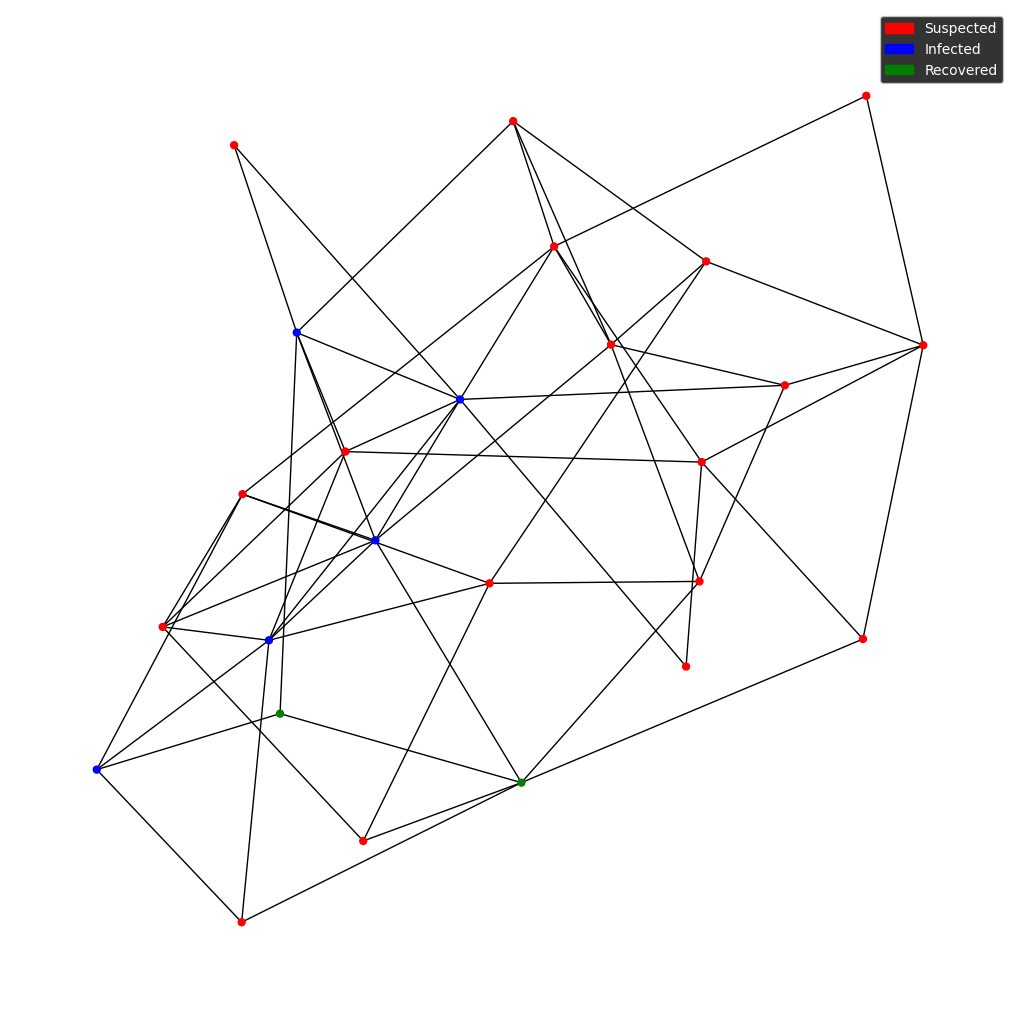

In [5]:
layout = visualize.plot_graph(preds.argmax(2)[15].detach().numpy(), initial_graph.to_sparse().indices().detach().numpy(), classes=['Suspected', 'Infected', 'Recovered'])

### Simulate with SIR (above individual-level)

In [6]:
model = SIR(horizon=190, infection_rate=0.05, recovery_rate=0.05) # infection_rate, recover_rate, fixed_population
preds = model(initial_states.sum(0), steps = None)

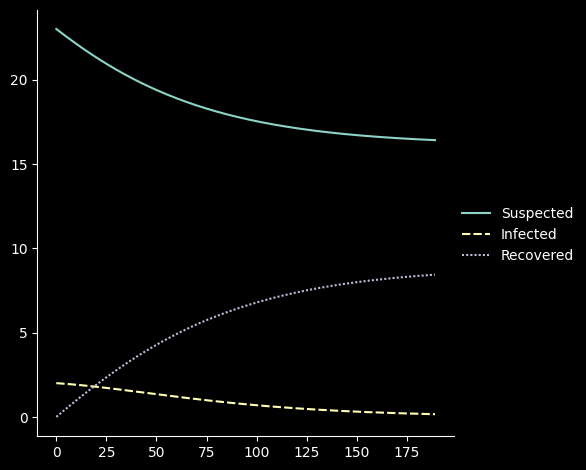

In [7]:
layout = visualize.plot_series(preds.detach().numpy(), columns=['Suspected', 'Infected', 'Recovered'])

### Construct graph from feature

In [8]:
feature = torch.rand(10,20)
adj = torch.randint(10,100, (10,10))
graph1 = simulation.get_graph_from_features(features=feature, adj=None)
graph2 = simulation.get_graph_from_features(features=feature, adj=adj)

In [9]:
graph1

tensor([[1.0000, 0.7808, 0.8003, 0.6512, 0.8244, 0.7968, 0.7771, 0.7579, 0.8322,
         0.8080],
        [0.7808, 1.0000, 0.8470, 0.8090, 0.8661, 0.8114, 0.8116, 0.7958, 0.7089,
         0.8266],
        [0.8003, 0.8470, 1.0000, 0.6816, 0.9092, 0.7984, 0.8456, 0.7888, 0.7578,
         0.7607],
        [0.6512, 0.8090, 0.6816, 1.0000, 0.7030, 0.7851, 0.7487, 0.7616, 0.6598,
         0.8302],
        [0.8244, 0.8661, 0.9092, 0.7030, 1.0000, 0.7943, 0.8051, 0.8155, 0.7977,
         0.8477],
        [0.7968, 0.8114, 0.7984, 0.7851, 0.7943, 1.0000, 0.8112, 0.8057, 0.8145,
         0.8651],
        [0.7771, 0.8116, 0.8456, 0.7487, 0.8051, 0.8112, 1.0000, 0.8642, 0.7064,
         0.7891],
        [0.7579, 0.7958, 0.7888, 0.7616, 0.8155, 0.8057, 0.8642, 1.0000, 0.7789,
         0.8016],
        [0.8322, 0.7089, 0.7578, 0.6598, 0.7977, 0.8145, 0.7064, 0.7789, 1.0000,
         0.8254],
        [0.8080, 0.8266, 0.7607, 0.8302, 0.8477, 0.8651, 0.7891, 0.8016, 0.8254,
         1.0000]])

In [10]:
graph2

tensor([[0.0135, 0.0300, 0.0170, 0.0107, 0.0137, 0.0133, 0.0108, 0.0110, 0.0090,
         0.0105],
        [0.0269, 0.0141, 0.0385, 0.0137, 0.0247, 0.0193, 0.0189, 0.0204, 0.0127,
         0.0100],
        [0.0105, 0.0282, 0.0667, 0.0341, 0.0101, 0.0082, 0.0104, 0.0168, 0.0077,
         0.0317],
        [0.0283, 0.0130, 0.0122, 0.0294, 0.0167, 0.0111, 0.0107, 0.0115, 0.0127,
         0.0268],
        [0.0217, 0.0135, 0.0178, 0.0293, 0.0182, 0.0081, 0.0144, 0.0146, 0.0111,
         0.0314],
        [0.0080, 0.0138, 0.0100, 0.0084, 0.0099, 0.0227, 0.0119, 0.0083, 0.0087,
         0.0333],
        [0.0120, 0.0451, 0.0604, 0.0080, 0.0179, 0.0737, 0.0357, 0.0096, 0.0172,
         0.0093],
        [0.0205, 0.0796, 0.0202, 0.0272, 0.0099, 0.0620, 0.0094, 0.0455, 0.0159,
         0.0131],
        [0.0347, 0.0083, 0.0361, 0.0118, 0.0101, 0.0113, 0.0102, 0.0211, 0.0120,
         0.0266],
        [0.0192, 0.0123, 0.0114, 0.0134, 0.0212, 0.0180, 0.0105, 0.0321, 0.0127,
         0.0127]])

### Simulate trace with TimeGEO

In [11]:
# prepare initial data

